In [1]:
import re
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import json

In [28]:
from collections import Counter

In [2]:
def process_tweet(tweet):
    """ Takes in a string, returns a list words in the string that aren't stopwords
    Parameters:
        tweet (string):  string of text to be tokenized
    Returns:
        stopwords_removed (list): list of all words in tweet, not including stopwords
    """
    stopwords_list=stopwords.words('english') +list(string.punctuation)
    stopwords_list += ["'",'"','...','``','…','’','‘','“',"''",'""','”','”','co',"'s'",'\'s','n\'t','\'m','\'re','amp','https']
    tokens = nltk.word_tokenize(tweet)
    stopwords_removed = [token.lower() for token in tokens if token not in stopwords_list]
    return stopwords_removed

In [3]:
def tokenized(series):
    """ Takes in a series containing strings or lists of strings, and creates a single list of all the words
    Parameters:
        series (series): series of text in the form of strings or lists of string 

    Returns:
        tokens (list): list of every word in the series, not including stopwords
    """

    corpus = ' '.join([tweet.lower() if type(tweet)==str else ' '.join([tag.lower() for tag in tweet]) for tweet in series])
    tokens = process_tweet(corpus)
    return tokens

In [4]:
def wordfrequency(series, top):
    """ Returns the frequency of words in a list of strings.
    Parameters:
        series (iterable): List of strings to be combined and analyzed
        top (int): The number of top words to return.
    Returns:
        list (tuples): List of word and value pairs for the top words in the series.
    """
    frequencies = FreqDist(tokenized(series))
    return frequencies.most_common(top)

In [68]:
def create_wordcloud(series, tag, *top):
    """ Take in a list of lists and create a WordCloud visualization for those terms.
    Parameters:
            series (iterable): A list of lists containing strings.
    Returns:
        None: The ouput is a visualization of the strings in series in terms of the
            frequency of their occurrence.
    """

    vocab = tokenized(series)
    if not top[0]:
        top[0]=200
    cloud=WordCloud(max_words=top[0]).generate(' '.join([word for word in vocab]))
    plt.imshow(cloud,interpolation='bilinear')
    plt.title(f'Most Common words for {tag}')
    plt.plot(figsize = (48,24))
    plt.axis('off')
    plt.show();

In [6]:
with open('data/tweets.json', 'r') as f:
    data = json.load(f)

In [24]:
def strip_tweets(tweet):
    '''Process tweet text to remove retweets, mentions,links and hashtags.'''
    retweet = r'RT:? ?@\w+:?'
    tweet= re.sub(retweet,'',tweet)
    mention = r'@\w+'
    tweet= re.sub(mention,'',tweet)
    links = r'^(http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?[a-z0-9]+([\-\.]{1}[a-z0-9]+)*\.[a-z]{2,5}(:[0-9]{1,5})?(\/.*)?$'
    tweet= re.sub(links,'',tweet)
    tweet_links = r'https:\/\/t\.co\/\w+|http:\/\/t\.co\/\w+'
    tweet=re.sub(tweet_links,'',tweet)  
    tweet_link = r'http\S+'
    tweet=re.sub(tweet_link,'',tweet)
    hashtag = r'#\w+'
    hashtags = re.findall(hashtag,tweet)
    tweet= re.sub(hashtag,'',tweet)
    return tweet, hashtags

In [37]:
def cluster_flocks(dicts):
    hashtags = Counter()
    tweets = []
    for dic in dicts.values():
        text, tag = strip_tweets(dic['text'])
        hashtags.update(tag)
        tweets.append([text, tag])
    return tweets, hashtags

In [21]:
data

{'1224787488906104833': {'created_at': '2020-02-04 20:11:07',
  'text': 'I guess old Lizzie has a plane for that....\n\ni mean plan!!\n#WarrenIsAsnake #warrenlies #privatejet #GreenNewDeal #IowaCaucuses #IowaFiasco #BernieWon #mayorcheats \n\nhttps://t.co/owDX1easIi',
  'lang': 'en',
  'retweet_count': 0,
  'favorite_count': 0,
  'user_id': 1088166441604603904,
  'coordinates': None,
  'hashtags': [None]},
 '1224787478915289088': {'created_at': '2020-02-04 20:11:05',
  'text': '@ShadowIncHQ #BernieWon #BernieOrBust #PresidentBernieSanders #DNCisCorrupt #DNCRigged #DNCRigging #WineCavePete is #corrupt #TomPerezResign #MayorCheat #PrematurePete',
  'lang': 'und',
  'in_reply_to_status_id': 1224773796307050497,
  'in_reply_to_user_id': 1141046691090632704,
  'retweet_count': 0,
  'favorite_count': 0,
  'user_id': 344028015,
  'coordinates': None,
  'hashtags': [None]},
 '1224787461085130753': {'created_at': '2020-02-04 20:11:00',
  'text': '“Never lose your sense of outrage...”\n\n#DNCRig

In [38]:
clean_tweets, tag_set = cluster_flocks(data)

In [39]:
tag_set.most_common(5)

[('#BernieWon', 522),
 ('#RiggedPrimary', 519),
 ('#MayorCheat', 512),
 ('#ShadowInc', 434),
 ('#IowaCaucusDisaster', 414)]

In [44]:
clean_tweets[0][0]

'I guess old Lizzie has a plane for that....\n\ni mean plan!!\n        \n\n'

In [60]:
subset = list(filter(lambda x: '#BernieWon' in x[1], clean_tweets))

In [61]:
len(subset)

520

In [66]:
print([tag for tag in tag_set.most_common(5)])

[('#BernieWon', 522), ('#RiggedPrimary', 519), ('#MayorCheat', 512), ('#ShadowInc', 434), ('#IowaCaucusDisaster', 414)]


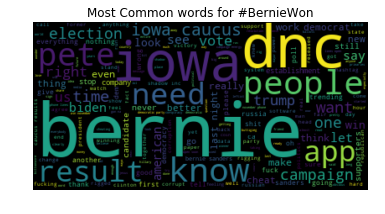

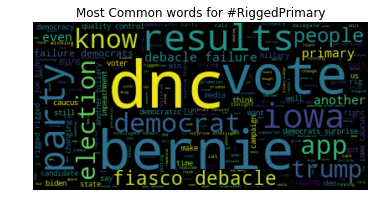

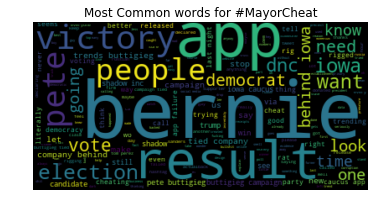

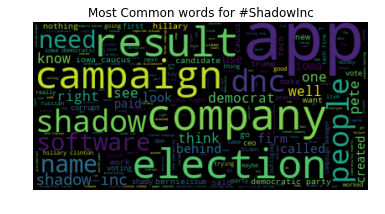

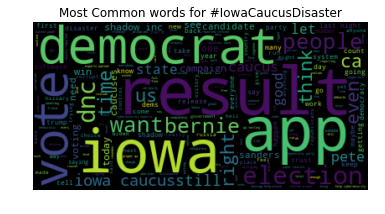

In [69]:
for tag in tag_set.most_common(5):
    subset = list(filter(lambda x: tag[0] in x[1], clean_tweets))
    create_wordcloud([tweet[0] for tweet in subset] , tag[0], 200)